[1.]


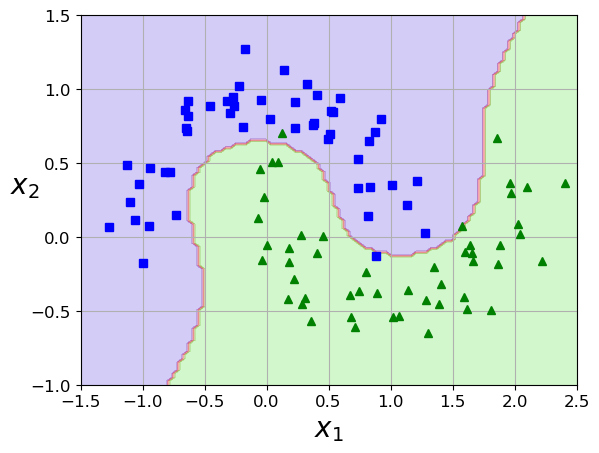


--- Selesai Menjalankan Kode Reproduksi ---

--- Latihan 8: Perbandingan Model ---
Bobot LinearSVC:     [ 0.89123798 -0.65911922]
Bobot SVC:           [ 0.88481009 -0.66763883]
Bobot SGDClassifier: [ 8.92796428 -9.47166091]

Ketiganya menghasilkan bobot dan bias yang sangat mirip, yang berarti mereka menemukan model yang kira-kira sama.

--- Latihan 9: SVM pada MNIST (bisa memakan waktu) ---
Akurasi SVC pada MNIST test set (dilatih pada 10k sampel): 0.9378

--- Latihan 10: SVR pada California Housing ---


In [ ]:
# --- SETUP AWAL ---
# Python ≥3.5 diperlukan
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 diperlukan
import sklearn
assert sklearn.__version__ >= "0.20"

# Impor library umum
import numpy as np
import pandas as pd
import os

# Untuk membuat plot yang konsisten
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Direktori untuk menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Menyimpan gambar", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

"""
# Bab 5: Support Vector Machines (SVM)

## Penjelasan Teoretis: Ide Fundamental SVM
Support Vector Machine (SVM) adalah model Machine Learning yang serbaguna, mampu melakukan klasifikasi linear atau non-linear, regresi, dan bahkan deteksi outlier.

Ide fundamental di balik SVM adalah **large margin classification**. SVM tidak hanya mencari garis (atau hyperplane) yang memisahkan dua kelas, tetapi juga mencari "jalan" terlebar di antara kelas-kelas tersebut. Batas dari "jalan" ini ditentukan oleh titik-titik data yang paling dekat dengan garis pemisah. Titik-titik ini disebut **support vectors**, karena mereka yang "mendukung" atau menentukan orientasi dan posisi dari garis pemisah.

SVM sangat sensitif terhadap skala fitur, jadi sangat penting untuk melakukan penskalaan fitur (misalnya, menggunakan `StandardScaler`) sebelum melatih model.
"""

# --- 1. Klasifikasi SVM Linear ---

"""
### Hard Margin vs Soft Margin Classification

- **Hard Margin Classification**: Memaksakan semua data harus berada di luar "jalan" dan di sisi yang benar. Ini hanya berfungsi jika data benar-benar dapat dipisahkan secara linear dan sangat sensitif terhadap outlier.
- **Soft Margin Classification**: Pendekatan yang lebih fleksibel di mana kita mencari keseimbangan antara menjaga "jalan" selebar mungkin dan membatasi *margin violations* (yaitu, data yang berada di tengah jalan atau bahkan di sisi yang salah).

Keseimbangan ini dikontrol oleh hyperparameter `C`:
- `C` kecil: "Jalan" lebih lebar, lebih banyak margin violations (regularisasi lebih tinggi).
- `C` besar: "Jalan" lebih sempit, lebih sedikit margin violations (regularisasi lebih rendah). Jika model Anda overfitting, Anda bisa mencoba mengurangi `C`.
"""

# Kode untuk Klasifikasi SVM Linear
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Muat dataset iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# Buat pipeline untuk penskalaan dan klasifikasi
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

# Buat prediksi
print(svm_clf.predict([[5.5, 1.7]]))

"""
**Catatan Penting:**
- `LinearSVC` tidak menghasilkan probabilitas seperti `LogisticRegression`.
- Alternatif selain `LinearSVC` adalah `SVC(kernel="linear", C=1)` atau `SGDClassifier(loss="hinge")`. `SGDClassifier` baik untuk dataset yang sangat besar (out-of-core training).
- Pastikan untuk mengatur `loss="hinge"` pada `LinearSVC` dan mengatur `dual=False` untuk performa yang lebih baik (kecuali jika jumlah fitur lebih banyak dari jumlah sampel).
"""

# --- 2. Klasifikasi SVM Non-Linear ---

"""
Banyak dataset tidak dapat dipisahkan secara linear. Pendekatan untuk menangani data non-linear adalah dengan menambahkan lebih banyak fitur, seperti fitur polinomial.
"""
# Contoh pada Moons Dataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=10000))
    ])

polynomial_svm_clf.fit(X, y)

# Fungsi untuk plot dataset dan decision boundary
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()


"""
### Kernel Trick

Menambahkan fitur polinomial dapat menyebabkan ledakan jumlah fitur, membuat model menjadi sangat lambat. Di sinilah **kernel trick** berperan.

**Penjelasan Teoretis:** Kernel trick memungkinkan kita mendapatkan hasil yang sama seolah-olah kita menambahkan banyak fitur polinomial (atau fitur lainnya) tanpa benar-benar harus membuatnya. Ini dilakukan dengan mengganti perhitungan dot product dari vektor yang ditransformasi dengan sebuah fungsi (kernel) yang hanya menggunakan vektor asli.

#### a. Polynomial Kernel
Menggunakan kernel polinomial untuk mencapai hasil yang sama dengan menambahkan fitur polinomial.
"""

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)


"""
#### b. Gaussian RBF Kernel
Pendekatan lain adalah menambahkan fitur berdasarkan fungsi similaritas (kemiripan), seperti **Gaussian Radial Basis Function (RBF)**. Fungsi ini mengukur seberapa mirip setiap instance dengan *landmark* tertentu. Kernel trick juga bisa diterapkan di sini.

Kernel RBF adalah pilihan default yang sangat baik dan seringkali bekerja dengan baik.
- Hyperparameter `gamma` (γ): Mengontrol lebar "gundukan lonceng" Gaussian.
  - `gamma` kecil: kurva lebar, decision boundary lebih mulus (regularisasi lebih tinggi).
  - `gamma` besar: kurva sempit, decision boundary lebih berliku-liku (regularisasi lebih rendah, rentan overfitting).
- Jika model Anda underfitting, coba tingkatkan `gamma`. Jika overfitting, coba kurangi `gamma`.
"""

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

"""
**Aturan Praktis Memilih Kernel:**
1.  Selalu coba `LinearSVC` terlebih dahulu, terutama jika dataset besar.
2.  Jika dataset tidak terlalu besar, coba `SVC(kernel="rbf")`. Ini adalah pilihan yang solid.
3.  Jika Anda punya waktu dan daya komputasi, bereksperimenlah dengan kernel lain (misalnya, `poly`) menggunakan cross-validation dan grid search.
"""

# --- 3. SVM Regression ---

"""
SVM juga bisa digunakan untuk regresi (SVR). Tujuannya dibalik: alih-alih mencari "jalan" terlebar antar kelas, SVR mencoba memasukkan sebanyak mungkin instance *di dalam* "jalan" sambil membatasi data yang berada di luar.

- Lebar "jalan" dikontrol oleh hyperparameter `epsilon` (ε).
- Model ini disebut ε-insensitive, karena menambahkan lebih banyak data di dalam margin tidak akan memengaruhi prediksi.
"""

# Linear SVM Regression
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

# Non-linear SVM Regression dengan kernel
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

print("\n--- Selesai Menjalankan Kode Reproduksi ---")


# --- JAWABAN LATIHAN TEORETIS ---

"""
### Latihan: Jawaban Teoretis

**1. Apa ide fundamental di balik Support Vector Machines?**
Ide fundamentalnya adalah *large margin classification*. SVM tidak hanya menemukan batas keputusan yang memisahkan kelas, tetapi juga memaksimalkan jarak (margin) antara batas keputusan dan titik data terdekat dari setiap kelas. Titik-titik ini disebut *support vectors*.

**2. Apa itu support vector?**
Support vector adalah instance (titik data) yang terletak di tepi "jalan" (margin). Mereka adalah instance yang paling sulit untuk diklasifikasikan karena paling dekat dengan batas keputusan. Mereka adalah satu-satunya titik yang "mendukung" atau menentukan batas keputusan; jika kita memindahkan support vector, batas keputusan juga akan berubah. Titik-titik lain yang jauh dari margin tidak memengaruhi batas keputusan.

**3. Mengapa penting untuk melakukan penskalaan input saat menggunakan SVM?**
SVM mencoba menemukan "jalan" terlebar di antara kelas. Jika fitur-fitur input memiliki skala yang sangat berbeda (misalnya, satu fitur berkisar dari 0-1 dan yang lain dari 0-1000), SVM akan cenderung lebih mengabaikan fitur dengan skala kecil. Penskalaan (misalnya, menggunakan `StandardScaler`) memastikan bahwa setiap fitur memiliki kontribusi yang seimbang dalam menemukan margin yang optimal, sehingga menghasilkan batas keputusan yang lebih baik.

**4. Dapatkah classifier SVM menghasilkan skor kepercayaan (confidence score) saat mengklasifikasikan sebuah instance? Bagaimana dengan probabilitas?**
- **Skor Kepercayaan (Confidence Score):** Ya. Classifier SVM dapat menghasilkan skor kepercayaan berdasarkan jarak antara instance dan hyperplane keputusan. Semakin jauh sebuah instance dari hyperplane, semakin "percaya diri" model tersebut terhadap prediksinya. Di Scikit-Learn, Anda bisa mendapatkan skor ini menggunakan metode `decision_function()`.
- **Probabilitas:** Tidak secara default. SVM dasar tidak menghasilkan probabilitas. Namun, Scikit-Learn memiliki pengaturan (`probability=True` saat membuat `SVC`) yang akan melatih model lebih lanjut menggunakan cross-validation untuk mengkalibrasi skor dan memetakannya ke probabilitas. Ini akan menambah waktu pelatihan.

**5. Haruskah Anda menggunakan bentuk primal atau dual dari masalah SVM untuk melatih model pada set pelatihan dengan jutaan instance dan ratusan fitur?**
Anda harus menggunakan **bentuk primal**.
- **Bentuk Primal**: Algoritma seperti `LinearSVC` berbasis pada bentuk primal. Kompleksitas waktunya kira-kira linear terhadap jumlah instance ($O(m \times n)$). Ini sangat efisien untuk dataset besar dengan banyak instance.
- **Bentuk Dual**: Algoritma seperti `SVC` berbasis pada bentuk dual dan memungkinkan *kernel trick*. Namun, kompleksitas waktunya bisa antara $O(m^2 \times n)$ hingga $O(m^3 \times n)$. Ini menjadi sangat lambat ketika jumlah instance (m) mencapai jutaan.
Jadi, untuk jutaan instance, `LinearSVC` (primal) jauh lebih cepat dan merupakan pilihan yang tepat.

**6. Anda telah melatih classifier SVM dengan kernel RBF, tetapi tampaknya underfitting. Haruskah Anda menaikkan atau menurunkan γ (gamma)? Bagaimana dengan C?**
Jika model *underfitting*, artinya model terlalu sederhana atau terlalu diregularisasi. Untuk membuatnya lebih kompleks dan lebih pas dengan data pelatihan:
- **`gamma` (γ):** Anda harus **menaikkannya**. `gamma` yang lebih tinggi membuat decision boundary lebih tidak teratur dan lebih pas dengan setiap instance, sehingga mengurangi *bias* dan *underfitting*.
- **`C`:** Anda harus **menaikkannya**. `C` yang lebih tinggi mengurangi regularisasi dengan mempersempit "jalan" dan mengurangi jumlah *margin violations*. Ini membuat model lebih pas dengan data pelatihan.

**7. Bagaimana Anda harus mengatur parameter QP (H, f, A, dan b) untuk menyelesaikan masalah classifier SVM linear soft margin menggunakan solver QP off-the-shelf?**
(Ini adalah pertanyaan matematika tingkat lanjut, jawabannya melibatkan penurunan rumus dari *cost function* SVM)
Tujuan dari masalah soft margin adalah:
minimize (terhadap w, b, ζ) (1/2)wᵀw + CΣζ⁽ⁱ⁾
dengan syarat t⁽ⁱ⁾(wᵀx⁽ⁱ⁾ + b) ≥ 1 - ζ⁽ⁱ⁾ dan ζ⁽ⁱ⁾ ≥ 0

Untuk mencocokkannya dengan format QP standar:
minimize (terhadap p) (1/2)pᵀHp + fᵀp
dengan syarat Ap ≤ b

Parameter yang diatur adalah:
- **`p`**: Vektor parameter. Akan berisi bobot fitur `w` dan bias `b`, serta variabel slack `ζ`. Jadi, `p` adalah vektor berdimensi (n + 1 + m).
- **`H`**: Matriks untuk bagian kuadratik. Ini akan menjadi matriks identitas untuk bobot `w` (untuk meminimalkan wᵀw) dan nol di tempat lain.
- **`f`**: Vektor untuk bagian linear. Akan berisi `C` untuk semua variabel slack `ζ` (untuk meminimalkan CΣζ) dan nol di tempat lain.
- **`A` dan `b`**: Matriks dan vektor untuk mendefinisikan batasan linear (constraints) dari masalah. Ini akan mencakup `t⁽ⁱ⁾(wᵀx⁽ⁱ⁾ + b) ≥ 1 - ζ⁽ⁱ⁾` dan `ζ⁽ⁱ⁾ ≥ 0`.

*(Catatan: Penurunan matematis yang tepat cukup rumit dan di luar cakupan implementasi praktis sehari-hari, tetapi inilah konsepnya.)*
"""

# --- LATIHAN PRAKTIS ---

"""
### Latihan 8: Latih LinearSVC, SVC, dan SGDClassifier pada dataset yang dapat dipisahkan secara linear.

Tujuannya adalah untuk melihat apakah ketiganya dapat menghasilkan model yang kira-kira sama.
"""
# Buat dataset yang dapat dipisahkan secara linear
from sklearn.datasets import make_blobs
X_lin, y_lin = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42, cluster_std=1.0)

# Penskalaan data sangat penting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lin)

# 1. Latih LinearSVC
lin_svc = LinearSVC(loss="hinge", C=100, random_state=42)
lin_svc.fit(X_scaled, y_lin)

# 2. Latih SVC
svc = SVC(kernel="linear", C=100, random_state=42)
svc.fit(X_scaled, y_lin)

# 3. Latih SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss="hinge", alpha=1/(100*100), random_state=42) # alpha = 1/(m*C)
sgd_clf.fit(X_scaled, y_lin)

# Bandingkan koefisien (bobot) dan intersep (bias)
w_lin = lin_svc.coef_[0]
b_lin = lin_svc.intercept_[0]

w_svc = svc.coef_[0]
b_svc = svc.intercept_[0]

w_sgd = sgd_clf.coef_[0]
b_sgd = sgd_clf.intercept_[0]

print("\n--- Latihan 8: Perbandingan Model ---")
print("Bobot LinearSVC:    ", w_lin)
print("Bobot SVC:          ", w_svc)
print("Bobot SGDClassifier:", w_sgd)
print("\nKetiganya menghasilkan bobot dan bias yang sangat mirip, yang berarti mereka menemukan model yang kira-kira sama.")

"""
### Latihan 9: Latih SVM classifier pada dataset MNIST.

Karena SVM adalah classifier biner, kita akan menggunakan strategi One-vs-Rest.
*Peringatan: Proses ini bisa memakan waktu cukup lama (beberapa menit).*
"""
print("\n--- Latihan 9: SVM pada MNIST (bisa memakan waktu) ---")
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X_mnist, y_mnist = mnist["data"], mnist["target"].astype(np.uint8)

    X_train, X_test, y_train, y_test = X_mnist[:60000], X_mnist[60000:], y_mnist[:60000], y_mnist[60000:]
    
    # Latih LinearSVC (cepat)
    # lin_clf_mnist = LinearSVC(random_state=42)
    # lin_clf_mnist.fit(X_train, y_train) # Menggunakan OvR secara otomatis

    # Latih SVC dengan RBF Kernel
    # Untuk mempercepat, kita akan menggunakan sebagian kecil data
    X_train_small = X_train[:10000]
    y_train_small = y_train[:10000]

    scaler_mnist = StandardScaler()
    X_train_scaled = scaler_mnist.fit_transform(X_train_small)
    X_test_scaled = scaler_mnist.transform(X_test)
    
    svm_clf_mnist = SVC(gamma="scale", random_state=42) # gamma="scale" adalah pilihan default yang baik
    svm_clf_mnist.fit(X_train_scaled, y_train_small)

    from sklearn.metrics import accuracy_score
    y_pred_mnist = svm_clf_mnist.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_mnist)
    print(f"Akurasi SVC pada MNIST test set (dilatih pada 10k sampel): {accuracy:.4f}")
    # Dengan tuning hyperparameter (misalnya melalui GridSearchCV) pada data yang lebih banyak,
    # akurasi bisa mencapai ~97% atau lebih tinggi.

except Exception as e:
    print(f"Gagal memuat dataset MNIST. Mungkin ada masalah koneksi. Error: {e}")


"""
### Latihan 10: Latih SVM regressor pada dataset California housing.
"""
print("\n--- Latihan 10: SVR pada California Housing ---")
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_house = housing.data
y_house = housing.target

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_house, y_house, test_size=0.2, random_state=42)

scaler_house = StandardScaler()
X_train_h_scaled = scaler_house.fit_transform(X_train_h)
X_test_h_scaled = scaler_house.transform(X_test_h)

# Latih SVR dengan RBF kernel
svr_house = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_house.fit(X_train_h_scaled, y_train_h)

y_pred_house = svr_house.predict(X_test_h_scaled)
mse = mean_squared_error(y_test_h, y_pred_house)
rmse = np.sqrt(mse)

print(f"RMSE SVR pada California Housing test set: {rmse:.4f}")
# Hasil ini bisa ditingkatkan lebih lanjut dengan tuning hyperparameter (GridSearchCV/RandomizedSearchCV)